In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

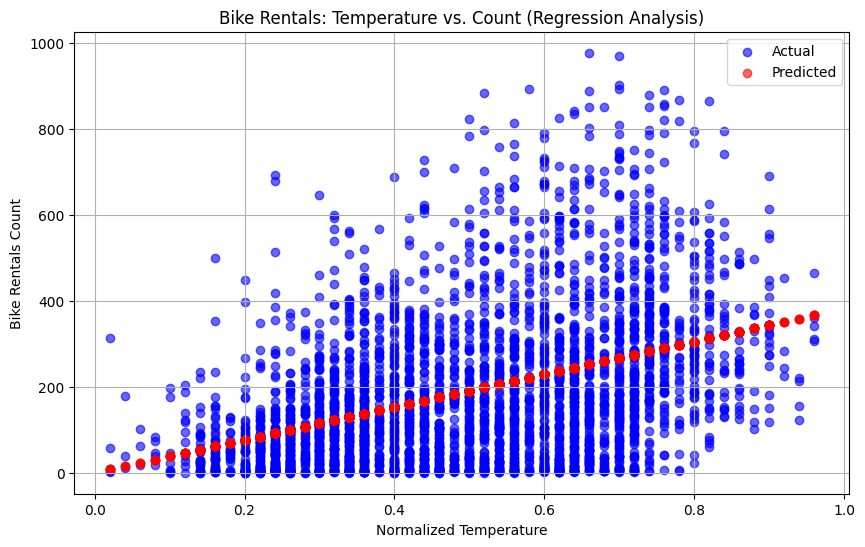

Mean Squared Error: 26363.54


In [7]:
data_url = "../hour.csv"
bike_data = pd.read_csv(data_url)

# Clean and prepare data
bike_data = bike_data[['temp', 'cnt']].dropna()

# Train-test split
X = bike_data[['temp']]
y = bike_data['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Visualize actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Bike Rentals: Temperature vs. Count (Regression Analysis)')
plt.xlabel('Normalized Temperature')
plt.ylabel('Bike Rentals Count')
plt.legend()
plt.grid()
plt.show()

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

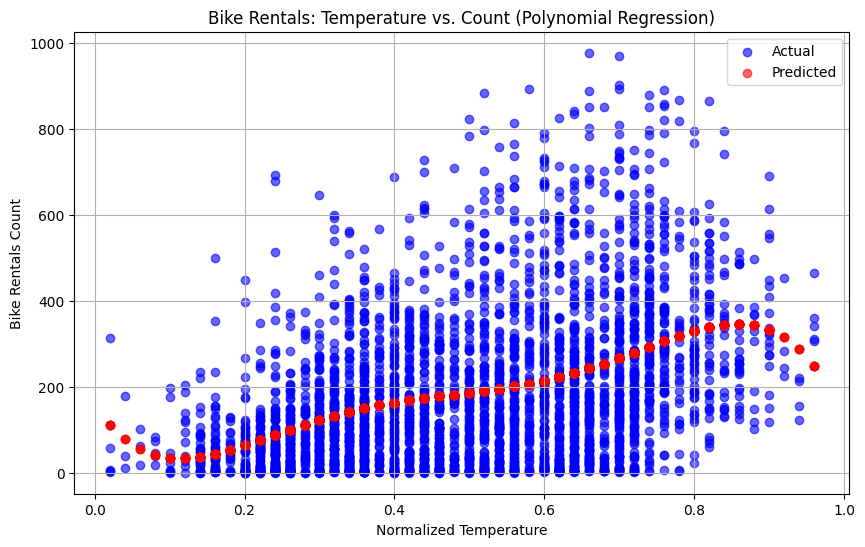

Mean Squared Error: 26201.35


In [9]:

# Transform features to polynomial
degree = 5  # Degree of the polynomial
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prediction
y_pred = model.predict(X_test_poly)

# Visualize actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Bike Rentals: Temperature vs. Count (Polynomial Regression)')
plt.xlabel('Normalized Temperature')
plt.ylabel('Bike Rentals Count')
plt.legend()
plt.grid()
plt.show()

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")